In [300]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from pygam import LinearGAM

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from math import sqrt
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv(r'AADT_Prediction_All_TableToExcel.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

OBJECTID                                Event_ID     Route_ID  \
0         1  {8D079B94-C3A4-40A8-AE49-42E5CC8D2521}  1000000R001   
1         2  {854D715E-F841-4B3A-BADD-23B5560BEC36}  1000000X000   
2         3  {343EE823-F7CA-4150-99A8-46F388B3D3E2}  1000000X000   
3         4  {D887B53D-4E28-42B2-BE16-C48C08F03E7D}  1000000X000   
4         5  {6CC38470-1A7A-4A63-8BE0-4DD73A9F6C49}  1000000X000   

       From_MPT     To_MPT Traffic_Link_ID  AADT  AADT_Year  Seg_Length_Miles  \
0 -2.000000e-08   0.055534        AL000296  3977       2019          0.055534   
1 -2.000000e-08   0.578787        AL000170  2063       2019          0.578787   
2  1.796364e+01  21.700538        AL000163  3795       2019          3.736898   
3  1.562891e+01  17.963640        AL000164  3229       2019          2.334728   
4  1.110782e+01  15.628912        AL002732  3998       2019          4.521093   

                                        Route_Name  Functional_Class  \
0  Sterling SB Wye (Kenai Spur) (Sterling Highway)               1.0   
1              Sterling Highway (Sterling Highway)               1.0   
2              Sterling Highway (Sterling Highway)               6.0   
3              Sterling Highway (Sterling Highway)               NaN   
4              Sterling Highway (Sterling Highway)               6.0   

   Road_Surface  Facility_Type HPMS_Grade_Class  Lane_Width  Through_Lanes  \
0             1             91                B        19.0              1   
1             1             96                B        15.0              2   
2             1             96                B        14.0              2   
3             1             96                A        12.0              2   
4             1             96                C        12.0              2   

      ID            NAME STATE_NAME ST_ABBREV  TOTPOP_CY  HHPOP_CY  \
0  99669        Soldotna     Alaska        AK      14387     14212   
1  99631      Moose Pass     Alaska        AK        218       213   
2  99572  Cooper Landing     Alaska        AK        366       357   
3  99572  Cooper Landing     Alaska        AK        366       357   
4  99572  Cooper Landing     Alaska        AK        366       357   

   POPDENS_CY  TOTHH_CY  AVGHHSZ_CY  CIVLBFR_CY  EMP_CY  UNEMP_CY  UNEMPRT_CY  \
0        17.2      5640        2.52        7870    7337       533         6.8   
1         1.1        91        2.34         152     137        15         9.9   
2         0.3       185        1.93         253     229        24         9.5   
3         0.3       185        1.93         253     229        24         9.5   
4         0.3       185        1.93         253     229        24         9.5   

   DIVINDX_CY  MEDHINC_CY  AVGHINC_CY  PCI_CY  HINCBASECY  MEDVAL_CY  \
0        32.0       68351       87945   34892        5640     245638   
1        21.1       74190       92340   39343          91     334783   
2        22.0       74602       91725   47158         185     334444   
3        22.0       74602       91725   47158         185     334444   
4        22.0       74602       91725   47158         185     334444   

   AVGVAL_CY  Region  FIPS  BOROUGH_ID                  BOROUGH  FIPS_CNTY  \
0     273799       1   122           6  KENAI PENINSULA BOROUGH        122   
1     323106       1   122           6  KENAI PENINSULA BOROUGH        122   
2     324630       1   122           6  KENAI PENINSULA BOROUGH        122   
3     324630       1   122           6  KENAI PENINSULA BOROUGH        122   
4     324630       1   122           6  KENAI PENINSULA BOROUGH        122   

   Shape_Length  
0    181.544009  
1   1893.250472  
2  12221.147720  
3   7632.962885  
4  14778.712140

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          3513 non-null   int64  
 1   Event_ID          3513 non-null   object 
 2   Route_ID          3513 non-null   object 
 3   From_MPT          3513 non-null   float64
 4   To_MPT            3513 non-null   float64
 5   Traffic_Link_ID   3513 non-null   object 
 6   AADT              3513 non-null   int64  
 7   AADT_Year         3513 non-null   int64  
 8   Seg_Length_Miles  3513 non-null   float64
 9   Route_Name        3513 non-null   object 
 10  Functional_Class  3513 non-null   float64
 11  Road_Surface      3513 non-null   int64  
 12  Facility_Type     3513 non-null   int64  
 13  HPMS_Grade_Class  3513 non-null   object 
 14  Lane_Width        3513 non-null   float64
 15  Through_Lanes     3513 non-null   int64  
 16  ID                3513 non-null   int64  


In [4]:
df.isnull().sum()

OBJECTID              0
Event_ID              0
Route_ID              0
From_MPT              0
To_MPT                0
Traffic_Link_ID       0
AADT                  0
AADT_Year             0
Seg_Length_Miles      0
Route_Name            0
Functional_Class    893
Road_Surface          0
Facility_Type         0
HPMS_Grade_Class    579
Lane_Width          238
Through_Lanes         0
ID                    0
NAME                  0
STATE_NAME            0
ST_ABBREV             0
TOTPOP_CY             0
HHPOP_CY              0
POPDENS_CY            0
TOTHH_CY              0
AVGHHSZ_CY            0
CIVLBFR_CY            0
EMP_CY                0
UNEMP_CY              0
UNEMPRT_CY            0
DIVINDX_CY            0
MEDHINC_CY            0
AVGHINC_CY            0
PCI_CY                0
HINCBASECY            0
MEDVAL_CY             0
AVGVAL_CY             0
Region                0
FIPS                  0
BOROUGH_ID            0
BOROUGH               0
FIPS_CNTY             0
Shape_Length    

In [6]:
df['Functional_Class'] = df.Functional_Class.fillna(method="Bfill")
df['Functional_Class'] = df.Functional_Class.fillna(method="Ffill")

In [7]:
df.isnull().sum()

OBJECTID              0
Event_ID              0
Route_ID              0
From_MPT              0
To_MPT                0
Traffic_Link_ID       0
AADT                  0
AADT_Year             0
Seg_Length_Miles      0
Route_Name            0
Functional_Class      0
Road_Surface          0
Facility_Type         0
HPMS_Grade_Class    579
Lane_Width          238
Through_Lanes         0
ID                    0
NAME                  0
STATE_NAME            0
ST_ABBREV             0
TOTPOP_CY             0
HHPOP_CY              0
POPDENS_CY            0
TOTHH_CY              0
AVGHHSZ_CY            0
CIVLBFR_CY            0
EMP_CY                0
UNEMP_CY              0
UNEMPRT_CY            0
DIVINDX_CY            0
MEDHINC_CY            0
AVGHINC_CY            0
PCI_CY                0
HINCBASECY            0
MEDVAL_CY             0
AVGVAL_CY             0
Region                0
FIPS                  0
BOROUGH_ID            0
BOROUGH               0
FIPS_CNTY             0
Shape_Length    

In [16]:
df['HPMS_Grade_Class'] = df.HPMS_Grade_Class.fillna(method="Ffill")

In [17]:
df.isnull().sum()

OBJECTID              0
Event_ID              0
Route_ID              0
From_MPT              0
To_MPT                0
Traffic_Link_ID       0
AADT                  0
AADT_Year             0
Seg_Length_Miles      0
Route_Name            0
Functional_Class      0
Road_Surface          0
Facility_Type         0
HPMS_Grade_Class      0
Lane_Width          238
Through_Lanes         0
ID                    0
NAME                  0
STATE_NAME            0
ST_ABBREV             0
TOTPOP_CY             0
HHPOP_CY              0
POPDENS_CY            0
TOTHH_CY              0
AVGHHSZ_CY            0
CIVLBFR_CY            0
EMP_CY                0
UNEMP_CY              0
UNEMPRT_CY            0
DIVINDX_CY            0
MEDHINC_CY            0
AVGHINC_CY            0
PCI_CY                0
HINCBASECY            0
MEDVAL_CY             0
AVGVAL_CY             0
Region                0
FIPS                  0
BOROUGH_ID            0
BOROUGH               0
FIPS_CNTY             0
Shape_Length    

In [18]:
df[df['Lane_Width'].isnull()==True]

OBJECTID                                Event_ID     Route_ID  \
421        422  {BCFF2049-D206-447D-8A75-8CF6DC16CA86}  2001000X000   
422        423  {C9CF7682-2F9D-4132-8E83-928618627597}  2001001X000   
849        850  {60B859C6-0250-431B-B05E-D17742679399}  2281096X000   
1127      1128  {8533A709-D02B-44E5-BD1A-895DE1803FED}  2281231X000   
1164      1165  {D60F9835-32A7-424C-929F-F4779DFAA7EF}  2281239X000   
1384      1385  {6F58477A-4E43-4E8F-ABE8-68C6C7F49214}  2301019X000   
1418      1419  {237E1F9A-CCE4-4CDE-9153-1095A45BCA9D}  2301048X000   
1459      1460  {6FA39EF1-3E8D-40F5-A683-BF42A4F451F3}  2341000X000   
1606      1607  {1BEDF1F4-8A1B-404D-AD93-1B8D1BCFEF70}  2381051X000   
1841      1842  {8895F547-C10A-48C5-BAAD-9652754307FA}  2581027X000   
1978      1979  {2EECAAB2-2E24-4A2F-91DD-AEE848C94D81}  2581116X000   
1989      1990  {53025F10-5B61-47DA-8E5C-6222A8C64558}  2581126X000   
2018      2019  {F9B5A020-FBC9-4C50-A112-B2B01E05F0B0}  2581141X000   
2284      2285  {3CFEC856-0559-4305-ACA3-604FF35FB075}  4181000X000   
2302      2303  {753495A1-ADAF-4FA4-84B3-37B1FB1BA79A}  4261014X000   
2318      2319  {1929C503-7179-456C-951C-176D39781E57}  4281006X000   
2319      2320  {2A0B072E-F762-4A17-A40D-8990EA575789}  4281006X000   
2405      2406  {023E2112-4B12-40FC-B4F1-2AC322E239A6}  4381000X000   
2452      2453  {85C4B810-EAB2-4005-B624-9F4193575830}  4441020X000   
2511      2512  {02947321-01C3-45C2-8F78-1C2BEA626AC2}  4441059X000   
2600      2601  {DACE61AD-38D1-4A81-BBB4-654236BE4B91}  4441118X000   
2644      2645  {33AC48BF-F9BB-42E3-9537-8A1520555755}  4461006X000   
2645      2646  {02181D6B-5218-406B-AE57-F17C25E1FBD5}  4461006X000   
2647      2648  {66BA448A-5976-4D80-9622-CB33C177F8A7}  4461007X000   
2648      2649  {7911CE1B-304A-4810-8EF1-D48CECF3E71B}  4461007X000   
2653      2654  {74AD2D14-4869-4414-B8F3-C7E5927BA209}  5001000X000   
2654      2655  {80C5F0CE-B475-49CB-B08A-D40C0E693C2A}  5001001X000   
2655      2656  {A7811BC7-8B00-441D-8670-066D5704DEA6}  5001002X000   
2658      2659  {9DC63B58-5866-49D8-90BC-85FB8261A1A0}  5021002X000   
2659      2660  {D128B2C1-5EE7-431F-88CD-D30F5527C625}  5021003X000   
2663      2664  {0029E218-2CDE-409A-98AC-55414A81B383}  5041002X000   
2665      2666  {D2898541-FAC7-43B6-BE59-223E3BECA50D}  5041004X000   
2667      2668  {CEFD37FE-AABA-4151-A828-B18E6EB0EB84}  5061000X000   
2668      2669  {97B74CF6-64B4-4EAF-975C-FDB14179DBE0}  5061001X000   
2723      2724  {4F029385-8114-4D88-8F6D-9CCB8DC626A2}  5101001X000   
2726      2727  {D6FB33FD-5840-4A0E-84B8-43B5D09249C5}  5101004X000   
2727      2728  {DD8BEF1E-8B71-4CEF-836A-1C209F6D2DBE}  5121000X000   
2728      2729  {8B373C03-3E4F-457B-8DFE-E209D4E8EF83}  5121001X000   
2729      2730  {8FDFF49F-E3B7-41F3-AFA5-79FB0BD5FF57}  5121002X000   
2730      2731  {1F4E925D-9DCA-429E-A178-7295FECC96A9}  5121003X000   
2731      2732  {D123DB54-673B-4B23-882E-50A9AE06BA98}  5121004X000   
2732      2733  {A1346EB7-3282-4EDB-BC61-BB63CCAE40C2}  5121005X000   
2765      2766  {BB7C056B-5C20-4E7B-BF79-285E1AC10229}  6021000X000   
2766      2767  {B9C593FE-DCFE-44D3-8BC1-318113862BE3}  6021000X000   
2767      2768  {265D38C1-CF56-4DF0-8D00-2E8C5615FC38}  6021001X000   
2768      2769  {145D9E1C-43D7-4785-B62E-FAA33F88D4D2}  6041000X000   
2769      2770  {E43A6260-41B6-4653-B1F6-BA2AD33CF610}  6041001X000   
2776      2777  {D00C3BAB-1C91-4EB7-B496-590758AAB8D8}  6081000X000   
2777      2778  {329EC60C-BA21-45C3-9519-8BA25ABDFEB7}  6101000X000   
2778      2779  {8A58C0DD-0FAA-44C3-B4FA-7E3C886EE335}  6101001X000   
2779      2780  {2C29A461-7FDF-4789-8255-98BA59A9ED31}  6101002X000   
2780      2781  {B24859B8-2A0B-46E6-8418-097DDC336A7E}  6121000X000   
2781      2782  {CC2EE6A0-8F77-4DA8-8DEB-9A351EB75BD3}  6121004X000   
2782      2783  {881C34F0-9692-46EC-B14D-83ED1598EAB2}  6141001X000   
2785      2786  {E126E5B9-B4A5-41FD-B1AE-CD34D33C4159}  6141008X000   
2786      2787  {D3D3D2AA-B799

In [25]:
df['Lane_Width'] = df.groupby('NAME',sort=False)['Lane_Width'].apply(lambda x: x.fillna(x.mean())).round()

In [26]:
df.isnull().sum()

OBJECTID              0
Event_ID              0
Route_ID              0
From_MPT              0
To_MPT                0
Traffic_Link_ID       0
AADT                  0
AADT_Year             0
Seg_Length_Miles      0
Route_Name            0
Functional_Class      0
Road_Surface          0
Facility_Type         0
HPMS_Grade_Class      0
Lane_Width          142
Through_Lanes         0
ID                    0
NAME                  0
STATE_NAME            0
ST_ABBREV             0
TOTPOP_CY             0
HHPOP_CY              0
POPDENS_CY            0
TOTHH_CY              0
AVGHHSZ_CY            0
CIVLBFR_CY            0
EMP_CY                0
UNEMP_CY              0
UNEMPRT_CY            0
DIVINDX_CY            0
MEDHINC_CY            0
AVGHINC_CY            0
PCI_CY                0
HINCBASECY            0
MEDVAL_CY             0
AVGVAL_CY             0
Region                0
FIPS                  0
BOROUGH_ID            0
BOROUGH               0
FIPS_CNTY             0
Shape_Length    

In [27]:
df[df['Lane_Width'].isnull()==True]

OBJECTID                                Event_ID     Route_ID  \
421        422  {BCFF2049-D206-447D-8A75-8CF6DC16CA86}  2001000X000   
422        423  {C9CF7682-2F9D-4132-8E83-928618627597}  2001001X000   
2405      2406  {023E2112-4B12-40FC-B4F1-2AC322E239A6}  4381000X000   
2667      2668  {CEFD37FE-AABA-4151-A828-B18E6EB0EB84}  5061000X000   
2668      2669  {97B74CF6-64B4-4EAF-975C-FDB14179DBE0}  5061001X000   
2727      2728  {DD8BEF1E-8B71-4CEF-836A-1C209F6D2DBE}  5121000X000   
2728      2729  {8B373C03-3E4F-457B-8DFE-E209D4E8EF83}  5121001X000   
2729      2730  {8FDFF49F-E3B7-41F3-AFA5-79FB0BD5FF57}  5121002X000   
2730      2731  {1F4E925D-9DCA-429E-A178-7295FECC96A9}  5121003X000   
2731      2732  {D123DB54-673B-4B23-882E-50A9AE06BA98}  5121004X000   
2732      2733  {A1346EB7-3282-4EDB-BC61-BB63CCAE40C2}  5121005X000   
2765      2766  {BB7C056B-5C20-4E7B-BF79-285E1AC10229}  6021000X000   
2766      2767  {B9C593FE-DCFE-44D3-8BC1-318113862BE3}  6021000X000   
2767      2768  {265D38C1-CF56-4DF0-8D00-2E8C5615FC38}  6021001X000   
2776      2777  {D00C3BAB-1C91-4EB7-B496-590758AAB8D8}  6081000X000   
2777      2778  {329EC60C-BA21-45C3-9519-8BA25ABDFEB7}  6101000X000   
2778      2779  {8A58C0DD-0FAA-44C3-B4FA-7E3C886EE335}  6101001X000   
2779      2780  {2C29A461-7FDF-4789-8255-98BA59A9ED31}  6101002X000   
2780      2781  {B24859B8-2A0B-46E6-8418-097DDC336A7E}  6121000X000   
2781      2782  {CC2EE6A0-8F77-4DA8-8DEB-9A351EB75BD3}  6121004X000   
2790      2791  {10DC7E05-A1DB-44DB-9035-1DC146096DC8}  6161001X000   
2791      2792  {AFE981BE-62A3-4AFB-BD81-D41F95E9287A}  6161003X000   
2792      2793  {25599E91-47AB-48CA-A370-37E9C8D6E7D7}  6161003X000   
2793      2794  {5B3E5912-DFDC-4309-B0F0-2718B4E60E6E}  6161004X000   
2794      2795  {7EEC1C14-E911-43BD-AED8-1C3A685AA8A7}  6161005X000   
2813      2814  {58392C69-91CA-4587-88FD-330F004D1377}  6261001X000   
2814      2815  {BAD68FC9-8D43-46A3-9B34-E11CD7385D68}  6261002X000   
2815      2816  {7050576F-ED9F-4CEA-A51F-B6FAFF19E3F6}  6261003X000   
2816      2817  {727B9012-8203-416F-894F-8382FCCF5A92}  6281000X000   
2817      2818  {BE5EE5AD-2B4B-4A38-AD33-34F9EE0A7594}  6281001X000   
2818      2819  {0D25D6D5-0E8E-4AB7-ACC2-6742AD70A3D3}  6281002X000   
2823      2824  {5889C9F1-E1DD-4D11-AA48-F5E410FE5290}  6321001X000   
2824      2825  {FB93B8C6-B404-4DFF-98C7-F04FF882C141}  6321002X000   
2825      2826  {89CDC03F-0C48-41F2-972D-7DB6C34F1740}  6321003X000   
2826      2827  {DDFE654B-7DA9-4B8B-9F4A-8ADA2447E3A8}  6321004X000   
2827      2828  {D1ABB889-3194-42DF-B056-EFA261C54BFB}  6321005X000   
2828      2829  {DD997E83-F893-4E92-93BF-F3D1244E30F4}  6321008X000   
2829      2830  {F7A42646-21BA-43E8-86F4-9B1EC2EDDEDF}  6321009X000   
2830      2831  {475B43B3-4E77-49E7-B9FA-BCD67153B9A5}  6341002X000   
2831      2832  {5C1ACC9C-7310-4444-8B65-C764E1D4E581}  6341005X000   
2832      2833  {8E6C49F0-B0C8-4D89-B351-E8C4CD23C603}  6341006X000   
2833      2834  {9F71805D-EB54-4A0D-81E7-730EAEA07803}  6341007X000   
2836      2837  {7469D1E7-D000-4C95-907E-B3F0C78E5871}  6341008X000   
2837      2838  {27FF4EEA-07BE-4FBE-898A-54EC974CF75F}  6361000X000   
2838      2839  {C5DEBCEA-1014-4FD3-A4BD-0FB1317B55BC}  6361001X000   
2842      2843  {7498CD83-556E-49D7-B3D1-742ACC25A595}  6461005X000   
2843      2844  {B45D37A2-4056-4729-AA94-6E63BD4FCA44}  6481000X000   
2844      2845  {BEAEE733-3ECA-4DEB-9654-E722BD021523}  6481001X000   
2845      2846  {6F16F96A-3788-4D48-BA45-7408826E8588}  6481002X000   
2846      2847  {5E66CFBA-C7AE-4493-ABBD-B9A7B81397C8}  6481004X000   
2847      2848  {6769352A-32AA-45A2-8B0A-EC523E077D15}  6481007X000   
2848      2849  {37C715FC-A41D-4908-B7A0-2743F992353A}  6481010X000   
2849      2850  {3258E23A-1DB6-4A69-A5CA-731F3EB11785}  6481011X000   
2850      2851  {44CD4917-6352-46CC-A649-0FBD14500BCD}  6481013X000   
2851      2852  {DE4D6E86-8EC1-41B0-8D85-D9DA76C41AB3}  6481014X000   
2852      2853  {67282027-E9FF

In [38]:
df['Lane_Width'] = df.groupby(['FIPS','Functional_Class', 'Facility_Type'],sort=False)['Lane_Width'].apply(lambda x: x.fillna(x.mean())).round()

In [45]:
df['Lane_Width'] = df['Lane_Width'].fillna(11)

In [46]:
df.isnull().sum()

OBJECTID            0
Event_ID            0
Route_ID            0
From_MPT            0
To_MPT              0
Traffic_Link_ID     0
AADT                0
AADT_Year           0
Seg_Length_Miles    0
Route_Name          0
Functional_Class    0
Road_Surface        0
Facility_Type       0
HPMS_Grade_Class    0
Lane_Width          0
Through_Lanes       0
ID                  0
NAME                0
STATE_NAME          0
ST_ABBREV           0
TOTPOP_CY           0
HHPOP_CY            0
POPDENS_CY          0
TOTHH_CY            0
AVGHHSZ_CY          0
CIVLBFR_CY          0
EMP_CY              0
UNEMP_CY            0
UNEMPRT_CY          0
DIVINDX_CY          0
MEDHINC_CY          0
AVGHINC_CY          0
PCI_CY              0
HINCBASECY          0
MEDVAL_CY           0
AVGVAL_CY           0
Region              0
FIPS                0
BOROUGH_ID          0
BOROUGH             0
FIPS_CNTY           0
Shape_Length        0
dtype: int64

In [47]:
df.isnull().sum().sum()

0

In [48]:
corr = df.corr()

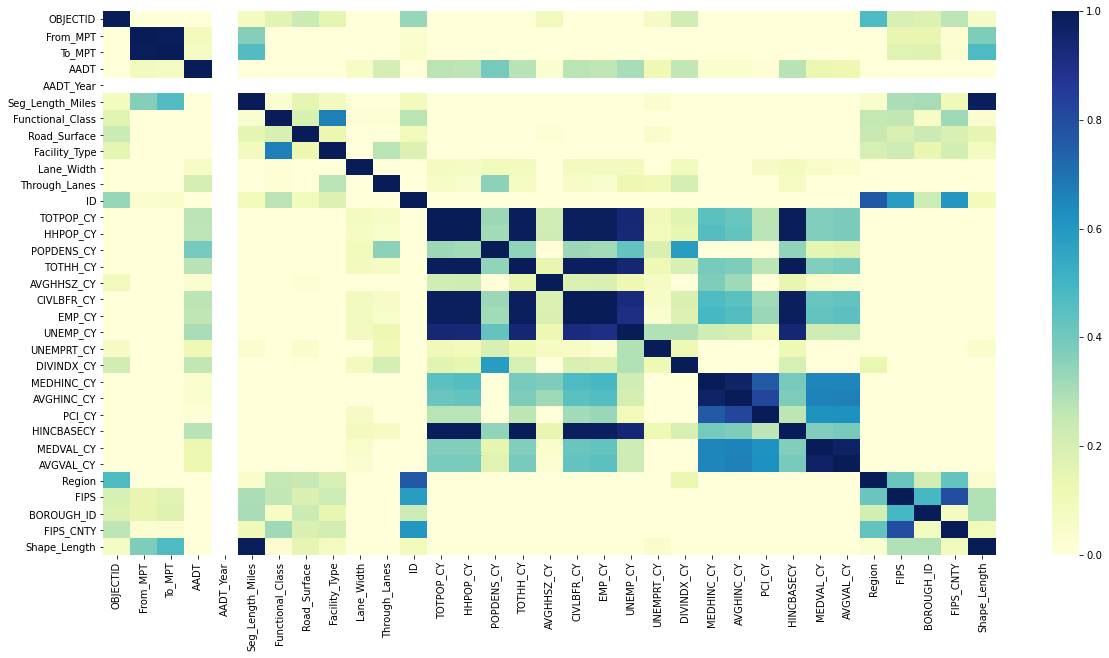

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, vmin=0, vmax=1, cmap="YlGnBu", ax = ax);

In [52]:
df.columns

Index(['OBJECTID', 'Event_ID', 'Route_ID', 'From_MPT', 'To_MPT',
       'Traffic_Link_ID', 'AADT', 'AADT_Year', 'Seg_Length_Miles',
       'Route_Name', 'Functional_Class', 'Road_Surface', 'Facility_Type',
       'HPMS_Grade_Class', 'Lane_Width', 'Through_Lanes', 'ID', 'NAME',
       'STATE_NAME', 'ST_ABBREV', 'TOTPOP_CY', 'HHPOP_CY', 'POPDENS_CY',
       'TOTHH_CY', 'AVGHHSZ_CY', 'CIVLBFR_CY', 'EMP_CY', 'UNEMP_CY',
       'UNEMPRT_CY', 'DIVINDX_CY', 'MEDHINC_CY', 'AVGHINC_CY', 'PCI_CY',
       'HINCBASECY', 'MEDVAL_CY', 'AVGVAL_CY', 'Region', 'FIPS', 'BOROUGH_ID',
       'BOROUGH', 'FIPS_CNTY', 'Shape_Length'],
      dtype='object')

In [67]:
fips = df.FIPS.unique()
fips_cnty= df.FIPS_CNTY.unique()

In [68]:
np.intersect1d(fips, fips_cnty,assume_unique=True, return_indices=True)

(array([ 13,  20,  60,  68,  90, 100, 110, 122, 130, 150, 164, 170, 185,
        188, 195, 220, 230, 275, 282], dtype=int64),
 array([21,  1, 23,  6,  5, 11, 17,  0, 13, 19, 22,  3,  8, 27, 15, 16, 12,
        14, 18], dtype=int64),
 array([16,  1, 18,  5,  4,  7, 13,  0,  9, 15, 17,  3,  6, 19, 11, 12,  8,
        10, 14], dtype=int64))

In [88]:
for fip in fips:
    if fip not in fips_cnty:
        print(fip)

261
29
240
29
290
29
198
29
105
29
16
29
70
29
50
29
180
29
158
29


In [89]:
print(len(fips))

29


In [87]:
for fip in fips_cnty:
    if fip not in fips:
        print(fip)

99


In [90]:
print(len(fips_cnty))

20


In [108]:
col_list = ['Traffic_Link_ID',
 'AADT',
 'Region',
 'FIPS',
 'BOROUGH_ID',
 'Functional_Class',
 'Road_Surface',
 'Facility_Type',
 'HPMS_Grade_Class',
 'Lane_Width',
 'Through_Lanes',
 'Seg_Length_Miles',
 'TOTPOP_CY',
 'HHPOP_CY',
 'POPDENS_CY',
 'TOTHH_CY',
 'AVGHHSZ_CY',
 'CIVLBFR_CY',
 'EMP_CY',
 'UNEMP_CY',
 'UNEMPRT_CY',
 'DIVINDX_CY',
 'PCI_CY',
 'HINCBASECY',
 'MEDVAL_CY',
 'AVGVAL_CY']

In [109]:
df_reduced = df.loc[:, col_list]

In [110]:
df_reduced.shape

(3513, 26)

In [120]:
dummy_list = []
dummy_list = df_reduced.iloc[:,2:11].columns.tolist()
dummy_list

['Region',
 'FIPS',
 'BOROUGH_ID',
 'Functional_Class',
 'Road_Surface',
 'Facility_Type',
 'HPMS_Grade_Class',
 'Lane_Width',
 'Through_Lanes']

In [121]:
prefix_list = []
for i in dummy_list:
    prefix_list.append(str(i[:1])+str(i[-1:]))
    print(str(i[:1])+str(i[-1:]))

Rn
FS
BD
Fs
Re
Fe
Hs
Lh
Ts


In [122]:
def get_all_dummies(df, dummy_list, prefix_list):
    
    for dummy in dummy_list:
        df_dummy = pd.get_dummies(df[dummy], prefix=dummy[:2])
        if dummy not in df_dummy.columns:
            df = pd.concat([df_dummy,df], axis=1)
            
    return df
df_clean = get_all_dummies(df_reduced, dummy_list, prefix_list)

In [123]:
df_clean.columns.tolist()

['Th_1',
 'Th_2',
 'Th_3',
 'Th_4',
 'Th_5',
 'Th_6',
 'La_8.0',
 'La_9.0',
 'La_10.0',
 'La_11.0',
 'La_12.0',
 'La_13.0',
 'La_14.0',
 'La_15.0',
 'La_16.0',
 'La_17.0',
 'La_18.0',
 'La_19.0',
 'La_20.0',
 'La_21.0',
 'La_22.0',
 'La_23.0',
 'La_26.0',
 'La_33.0',
 'HP_A',
 'HP_B',
 'HP_C',
 'HP_D',
 'HP_E',
 'HP_F',
 'Fa_4',
 'Fa_6',
 'Fa_91',
 'Fa_92',
 'Fa_93',
 'Fa_94',
 'Fa_95',
 'Fa_96',
 'Fa_97',
 'Fa_99',
 'Ro_1',
 'Ro_2',
 'Ro_3',
 'Fu_1.0',
 'Fu_3.0',
 'Fu_4.0',
 'Fu_5.0',
 'Fu_6.0',
 'Fu_7.0',
 'BO_1',
 'BO_2',
 'BO_3',
 'BO_4',
 'BO_5',
 'BO_6',
 'BO_7',
 'BO_8',
 'BO_9',
 'BO_10',
 'BO_11',
 'BO_12',
 'BO_13',
 'BO_14',
 'BO_15',
 'BO_16',
 'BO_17',
 'BO_18',
 'BO_19',
 'BO_99',
 'FI_13',
 'FI_16',
 'FI_20',
 'FI_50',
 'FI_60',
 'FI_68',
 'FI_70',
 'FI_90',
 'FI_100',
 'FI_105',
 'FI_110',
 'FI_122',
 'FI_130',
 'FI_150',
 'FI_158',
 'FI_164',
 'FI_170',
 'FI_180',
 'FI_185',
 'FI_188',
 'FI_195',
 'FI_198',
 'FI_220',
 'FI_230',
 'FI_240',
 'FI_261',
 'FI_275',
 'FI_28

In [131]:
df_final = df_clean.drop([
                          'Functional_Class',
                          'Road_Surface', 
                          'Facility_Type', 
                          'HPMS_Grade_Class', 
                          'Lane_Width',
                          'Through_Lanes', 
                          'Region',
                          'FIPS',
                          'BOROUGH_ID'],
                          axis=1)

In [132]:
df_final = df_final.set_index('Traffic_Link_ID')

In [133]:
df_final.columns.tolist()

['Th_1',
 'Th_2',
 'Th_3',
 'Th_4',
 'Th_5',
 'Th_6',
 'La_8.0',
 'La_9.0',
 'La_10.0',
 'La_11.0',
 'La_12.0',
 'La_13.0',
 'La_14.0',
 'La_15.0',
 'La_16.0',
 'La_17.0',
 'La_18.0',
 'La_19.0',
 'La_20.0',
 'La_21.0',
 'La_22.0',
 'La_23.0',
 'La_26.0',
 'La_33.0',
 'HP_A',
 'HP_B',
 'HP_C',
 'HP_D',
 'HP_E',
 'HP_F',
 'Fa_4',
 'Fa_6',
 'Fa_91',
 'Fa_92',
 'Fa_93',
 'Fa_94',
 'Fa_95',
 'Fa_96',
 'Fa_97',
 'Fa_99',
 'Ro_1',
 'Ro_2',
 'Ro_3',
 'Fu_1.0',
 'Fu_3.0',
 'Fu_4.0',
 'Fu_5.0',
 'Fu_6.0',
 'Fu_7.0',
 'BO_1',
 'BO_2',
 'BO_3',
 'BO_4',
 'BO_5',
 'BO_6',
 'BO_7',
 'BO_8',
 'BO_9',
 'BO_10',
 'BO_11',
 'BO_12',
 'BO_13',
 'BO_14',
 'BO_15',
 'BO_16',
 'BO_17',
 'BO_18',
 'BO_19',
 'BO_99',
 'FI_13',
 'FI_16',
 'FI_20',
 'FI_50',
 'FI_60',
 'FI_68',
 'FI_70',
 'FI_90',
 'FI_100',
 'FI_105',
 'FI_110',
 'FI_122',
 'FI_130',
 'FI_150',
 'FI_158',
 'FI_164',
 'FI_170',
 'FI_180',
 'FI_185',
 'FI_188',
 'FI_195',
 'FI_198',
 'FI_220',
 'FI_230',
 'FI_240',
 'FI_261',
 'FI_275',
 'FI_28

In [134]:
X = df_final.drop('AADT',axis=1)
y = np.array(df_final.loc[:, 'AADT'])

In [136]:
import plotly.express as px
fig = px.histogram(df_final, x="AADT", log_y='count') #log_y helps intelligibility
fig.show()

In [138]:
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [144]:
# X_resampled_ada, y_resampled_ada = ADASYN(n_neighbors=2).fit_resample(X, y)
# X_resampled_smt, y_resampled_smt = SMOTE().fit_resample(X, y)
sme = SMOTEENN(random_state=42)
tmk = SMOTETomek(random_state=42)
# X_resampled_tmk, y_resampled_tmk = tmk.fit_resample(X, y)

In [145]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [ ]:
X_resampled_tmk, y_resampled_tmk = tmk.fit_resample(X_ros, y_ros)

In [157]:
X_resampled_sme, y_resampled_sme = sme.fit_resample(X_ros, y_ros)

In [165]:
import plotly.graph_objects as go

"""updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='Log Scale',
                 method='update',
                 args=[{'visible': [True, True]},
                       {'title': 'Log scale',
                        'yaxis': {'type': 'log'}}]),
            dict(label='Linear Scale',
                 method='update',
                 args=[{'visible': [True, False]},
                       {'title': 'Linear scale',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus, title='Linear scale')"""

fig = go.Figure() # layout=layout
fig.add_trace(go.Histogram(x=y_ros,
    name='y_ros'))
fig.add_trace(go.Histogram(x=y_resampled_tmk,
    name='y_resampled_tmk'))
fig.add_trace(go.Histogram(x=y_resampled_sme,
    name='y_resampled_sme'))
fig.add_trace(go.Histogram(x=y,
    name='y'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)

fig.update_layout(yaxis_type="log")
fig.show()

# Feature Engineering

[6.10873732e-03 1.01380151e-02 4.62358508e-03 5.78521897e-03
 2.96288596e-04 7.21015807e-04 1.45691975e-03 3.95193448e-03
 1.07853838e-02 1.34909598e-02 3.03566020e-02 1.58109698e-02
 1.78840069e-02 1.04955247e-02 8.77918448e-03 7.74670624e-03
 4.38264682e-03 2.01843576e-03 1.62086292e-03 2.93018209e-03
 1.58977983e-03 4.64666137e-04 3.67584658e-04 9.42688382e-05
 3.15361728e-02 3.33396667e-02 2.07678285e-02 1.15842499e-02
 5.35492829e-03 2.86106282e-03 3.56079210e-03 5.15059329e-03
 6.14648811e-04 3.24112723e-04 5.99151731e-04 1.21871602e-03
 1.44117358e-03 7.15969093e-03 3.03750775e-04 3.70383616e-05
 3.78241807e-03 3.98167873e-03 1.06901463e-04 7.27104698e-03
 7.88633949e-03 1.42044532e-02 1.54700970e-02 1.98506679e-02
 1.54250411e-02 2.48063633e-04 1.23626368e-04 3.26900112e-04
 8.82329613e-04 2.22570600e-04 1.06495763e-03 3.26859640e-04
 8.69514850e-04 7.85323469e-04 3.23845076e-04 1.17817855e-04
 7.62913533e-05 5.06108338e-04 3.49801714e-04 4.45379594e-04
 1.18496441e-04 2.326671

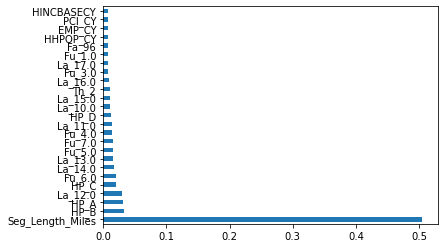

In [172]:
def feature_importance(X, y, n):
    #Fit the model
    model_extra = ExtraTreesClassifier()
    model_extra.fit(X,  y)
    print(model_extra.feature_importances_)
    
    #plot graph of feature importances
    feat_importances = pd.Series(model_extra.feature_importances_, index=X.columns)
    feat_importances.nlargest(n).plot(kind='barh')
    plt.show()
    return feat_importances

xy_feat_importances = feature_importance(X, y, 25)

In [173]:
xy_feat_importances.sort_values(ascending=False)

Seg_Length_Miles    0.504645
HP_B                0.033340
HP_A                0.031536
La_12.0             0.030357
HP_C                0.020768
Fu_6.0              0.019851
La_14.0             0.017884
La_13.0             0.015811
Fu_5.0              0.015470
Fu_7.0              0.015425
Fu_4.0              0.014204
La_11.0             0.013491
HP_D                0.011584
La_10.0             0.010785
La_15.0             0.010496
Th_2                0.010138
La_16.0             0.008779
Fu_3.0              0.007886
La_17.0             0.007747
Fu_1.0              0.007271
Fa_96               0.007160
HHPOP_CY            0.007009
EMP_CY              0.006967
PCI_CY              0.006916
HINCBASECY          0.006887
UNEMPRT_CY          0.006803
CIVLBFR_CY          0.006788
TOTPOP_CY           0.006776
DIVINDX_CY          0.006767
UNEMP_CY            0.006762
TOTHH_CY            0.006747
MEDVAL_CY           0.006702
AVGVAL_CY           0.006695
POPDENS_CY          0.006502
AVGHHSZ_CY    

[4.14355790e-03 5.89448430e-03 2.98914104e-03 3.93064366e-03
 4.24614937e-04 7.50298913e-04 1.23597232e-03 3.10519134e-03
 1.15269222e-02 1.36220737e-02 3.31442333e-02 1.60573282e-02
 1.84577509e-02 8.64621159e-03 8.62929767e-03 7.00427877e-03
 4.93000607e-03 2.06520667e-03 1.96867561e-03 2.38138379e-03
 1.43766241e-03 7.27942350e-04 4.64451229e-04 4.09638648e-04
 3.35401227e-02 3.70647629e-02 2.29100574e-02 1.24226833e-02
 5.19270669e-03 3.07748037e-03 2.99790972e-03 3.97185690e-03
 7.29736981e-04 2.41029239e-04 7.41588641e-04 9.90805248e-04
 1.63497236e-03 5.27905763e-03 3.58292293e-04 3.57737778e-04
 7.54917225e-03 7.23412671e-03 2.60199474e-04 8.18884843e-03
 7.29450873e-03 1.32372754e-02 1.61897137e-02 2.32230537e-02
 1.69473444e-02 5.34217827e-04 1.60263286e-04 5.50377395e-04
 1.34224963e-03 3.53810837e-04 1.19652174e-03 3.36075306e-04
 1.19077411e-03 1.13582467e-03 4.68933059e-04 1.71164501e-04
 2.19556491e-04 7.03392589e-05 3.20656643e-04 7.78855934e-05
 1.20898493e-04 2.563537

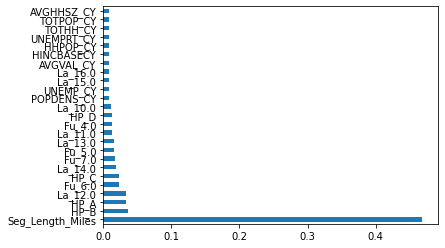

In [174]:
sme_feat_importances = feature_importance(X_resampled_sme, y_resampled_sme, 25)

In [178]:
sme_feat_importances.sort_values(ascending=False).head(25).index.tolist()

['Seg_Length_Miles',
 'HP_B',
 'HP_A',
 'La_12.0',
 'Fu_6.0',
 'HP_C',
 'La_14.0',
 'Fu_7.0',
 'Fu_5.0',
 'La_13.0',
 'La_11.0',
 'Fu_4.0',
 'HP_D',
 'La_10.0',
 'POPDENS_CY',
 'UNEMP_CY',
 'La_15.0',
 'La_16.0',
 'AVGVAL_CY',
 'HINCBASECY',
 'HHPOP_CY',
 'UNEMPRT_CY',
 'TOTHH_CY',
 'TOTPOP_CY',
 'AVGHHSZ_CY']

In [197]:
def grab_columns(df, starts_with):
    dummy_mask = df.columns.str.startswith(starts_with)
    df_mask = df.iloc[:,dummy_mask]
    feature_list = df_mask.columns.tolist()
    return feature_list

In [198]:
HP_list = grab_columns(df_final, 'HP')

In [200]:
La_list = grab_columns(df_final, 'La')

In [201]:
Fu_list = grab_columns(df_final, 'Fu')

In [202]:
Th_list = grab_columns(df_final, 'Th')

In [203]:
Fa_list = grab_columns(df_final, 'Fa')

In [224]:
features_list = []
for f in HP_list, La_list, Fu_list, Th_list, Fa_list:
    if f not in features_list:
        features_list.extend(f)
        print(f'f: {f}')

f: ['HP_A', 'HP_B', 'HP_C', 'HP_D', 'HP_E', 'HP_F']
f: ['La_8.0', 'La_9.0', 'La_10.0', 'La_11.0', 'La_12.0', 'La_13.0', 'La_14.0', 'La_15.0', 'La_16.0', 'La_17.0', 'La_18.0', 'La_19.0', 'La_20.0', 'La_21.0', 'La_22.0', 'La_23.0', 'La_26.0', 'La_33.0']
f: ['Fu_1.0', 'Fu_3.0', 'Fu_4.0', 'Fu_5.0', 'Fu_6.0', 'Fu_7.0']
f: ['Th_1', 'Th_2', 'Th_3', 'Th_4', 'Th_5', 'Th_6']
f: ['Fa_4', 'Fa_6', 'Fa_91', 'Fa_92', 'Fa_93', 'Fa_94', 'Fa_95', 'Fa_96', 'Fa_97', 'Fa_99']


In [225]:
join_list = [
    'Seg_Length_Miles',
 'POPDENS_CY',
 'UNEMP_CY',
 'AVGVAL_CY',
 'HINCBASECY',
 'HHPOP_CY',
 'UNEMPRT_CY',
 'TOTHH_CY',
 'TOTPOP_CY',
 'AVGHHSZ_CY'
]

In [226]:
the_list = join_list + features_list

In [237]:
the_list.append('AADT')

In [238]:
the_list

['Seg_Length_Miles',
 'POPDENS_CY',
 'UNEMP_CY',
 'AVGVAL_CY',
 'HINCBASECY',
 'HHPOP_CY',
 'UNEMPRT_CY',
 'TOTHH_CY',
 'TOTPOP_CY',
 'AVGHHSZ_CY',
 'HP_A',
 'HP_B',
 'HP_C',
 'HP_D',
 'HP_E',
 'HP_F',
 'La_8.0',
 'La_9.0',
 'La_10.0',
 'La_11.0',
 'La_12.0',
 'La_13.0',
 'La_14.0',
 'La_15.0',
 'La_16.0',
 'La_17.0',
 'La_18.0',
 'La_19.0',
 'La_20.0',
 'La_21.0',
 'La_22.0',
 'La_23.0',
 'La_26.0',
 'La_33.0',
 'Fu_1.0',
 'Fu_3.0',
 'Fu_4.0',
 'Fu_5.0',
 'Fu_6.0',
 'Fu_7.0',
 'Th_1',
 'Th_2',
 'Th_3',
 'Th_4',
 'Th_5',
 'Th_6',
 'Fa_4',
 'Fa_6',
 'Fa_91',
 'Fa_92',
 'Fa_93',
 'Fa_94',
 'Fa_95',
 'Fa_96',
 'Fa_97',
 'Fa_99',
 'AADT']

In [239]:
df_model = pd.DataFrame(df_final, columns=the_list)

In [240]:
df_model.head()

Seg_Length_Miles  POPDENS_CY  UNEMP_CY  AVGVAL_CY  \
Traffic_Link_ID                                                      
AL000296                 0.055534        17.2       533     273799   
AL000170                 0.578787         1.1        15     323106   
AL000163                 3.736898         0.3        24     324630   
AL000164                 2.334728         0.3        24     324630   
AL002732                 4.521093         0.3        24     324630   

                 HINCBASECY  HHPOP_CY  UNEMPRT_CY  TOTHH_CY  TOTPOP_CY  \
Traffic_Link_ID                                                          
AL000296               5640     14212         6.8      5640      14387   
AL000170                 91       213         9.9        91        218   
AL000163                185       357         9.5       185        366   
AL000164                185       357         9.5       185        366   
AL002732                185       357         9.5       185        366   

                 AVGHHSZ_CY  HP_A  HP_B  HP_C  HP_D  HP_E  HP_F  La_8.0  \
Traffic_Link_ID                                                           
AL000296               2.52     0     1     0     0     0     0       0   
AL000170               2.34     0     1     0     0     0     0       0   
AL000163               1.93     0     1     0     0     0     0       0   
AL000164               1.93     1     0     0     0     0     0       0   
AL002732               1.93     0     0     1     0     0     0       0   

                 La_9.0  La_10.0  La_11.0  La_12.0  La_13.0  La_14.0  La_15.0  \
Traffic_Link_ID                                                                 
AL000296              0        0        0        0        0        0        0   
AL000170              0        0        0        0        0        0        1   
AL000163              0        0        0        0        0        1        0   
AL000164              0        0        0        1        0        0        0   
AL002732              0        0        0        1        0        0        0   

                 La_16.0  La_17.0  La_18.0  La_19.0  La_20.0  La_21.0  \
Traffic_Link_ID                                                         
AL000296               0        0        0        1        0        0   
AL000170               0        0        0        0        0        0   
AL000163               0        0        0        0        0        0   
AL000164               0        0        0        0        0        0   
AL002732               0        0        0        0        0        0   

                 La_22.0  La_23.0  La_26.0  La_33.0  Fu_1.0  Fu_3.0  Fu_4.0  \
Traffic_Link_ID                                                               
AL000296               0        0        0        0       1       0       0   
AL000170               0        0        0        0       1       0       0   
AL000163               0        0        0        0       0       0       0   
AL000164               0        0        0        0       0       0       0   
AL002732               0        0        0        0       0       0       0   

                 Fu_5.0  Fu_6.0  Fu_7.0  Th_1  Th_2  Th_3  Th_4  Th_5  Th_6  \
Traffic_Link_ID                                                               
AL000296              0       0       0     1     0     0     0     0     0   
AL000170              0       0       0     0     1     0     0     0     0   
AL000163              0       1       0     0     1     0     0     0     0   
AL000164              0       1       0     0     1     0     0     0     0   
AL002732              0       1       0     0     1     0     0     0     0   

                 Fa_4  Fa_6  Fa_91  Fa_92  Fa_93  Fa_94  Fa_95  Fa_96  Fa_97  \
Traffic_Link_ID                                                                
AL000296            0     0      1      0      0      0      0      0      0   
AL000170            0     0      0      0      0     

In [241]:
df_model.shape

(3513, 57)

In [242]:
X = df_model.drop('AADT',axis=1)
y = np.array(df_model.loc[:, 'AADT'])

In [243]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [244]:
X_resampled_sme, y_resampled_sme = sme.fit_resample(X_ros, y_ros)

In [248]:
fig = go.Figure() # layout=layout
fig.add_trace(go.Histogram(x=y_ros,
    name='y_ros'))
fig.add_trace(go.Histogram(x=y_resampled_sme,
    name='y_resampled_sme'))
fig.add_trace(go.Histogram(x=y,
    name='y'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)

fig.update_layout(yaxis_type="log")
fig.show()

# Evaluate Model Metrics

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_sme, y_resampled_sme, test_size=0.2, random_state=42)

In [256]:
def evaluate_model(model, model_pred, y_test):
        r2 = r2_score(y_test,model_pred)
        print(f'{model} r2 score: {r2}')
        rmse = np.sqrt(MSE(y_test, model_pred))
        print(f'{model} rmse: {rmse}')
        mae = MAE(y_test, model_pred)
        print(f'{model} mae: {mae}')
        evs = explained_variance_score(y_test, model_pred)
        print(f'{model} explained variance: {evs}')

In [257]:
models = {
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors = int(np.sqrt(len(X_train)))),
    'SupportVectorRegressor': SVR(C = .1),
    'RandomForestRegressor': RandomForestRegressor(max_depth = 10),
    'XGBRegressor': XGBRegressor(max_depth = 10),
    'LGBMRegressor': LGBMRegressor(num_leaves = 15),
    'GradientBoostingRegressor': GradientBoostingRegressor(max_depth = 10),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'CatBoostRegressor': CatBoostRegressor(iterations=3,
                          learning_rate=1,
                          depth=5)
}

In [258]:
mae = pd.DataFrame(columns = ['train', 'test'])

for model_name in list(models.keys()):

    # fit model
    models[model_name].fit(X_train, y_train)
    
    # compute mean absolute error of model in train and test set
    mae.loc[model_name,:] = [MAE(y_train, models[model_name].predict(X_train)), MAE(y_test, models[model_name].predict(X_test))]
    
    model_predict = models[model_name].predict(X_test)
    evaluate_model(models[model_name], model_predict, y_test)

LinearRegression() r2 score: 0.24381688214023756
LinearRegression() rmse: 6791.6359122054255
LinearRegression() mae: 4398.046401773271
LinearRegression() explained variance: 0.2439454515927777
KNeighborsRegressor(n_neighbors=155) r2 score: 0.32373006510593294
KNeighborsRegressor(n_neighbors=155) rmse: 6422.748961596433
KNeighborsRegressor(n_neighbors=155) mae: 4026.3046083708377
KNeighborsRegressor(n_neighbors=155) explained variance: 0.3238928824980021
SVR(C=0.1) r2 score: -0.14433614281865115
SVR(C=0.1) rmse: 8354.831873811852
SVR(C=0.1) mae: 4434.913934308282
SVR(C=0.1) explained variance: 0.0008965406334826564
RandomForestRegressor(max_depth=10) r2 score: 0.7751668085893436
RandomForestRegressor(max_depth=10) rmse: 3703.3189716602747
RandomForestRegressor(max_depth=10) mae: 2445.3954901819297
RandomForestRegressor(max_depth=10) explained variance: 0.775168591893383
[09:56:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is

In [ ]:
def plot_train_test(model_class, value_range_max, parameter,other_param=None, other_value=None):
    
    
    train_scores, test_scores = list(), list()
    # define the tree depths to evaluate
    values = [i for i in range(1, value_range_max)]
    # evaluate a decision tree for each depth
    for i in values:
        # configure the model
        
        model = model_class(parameter=i)
        # fit model on the training dataset
        model.fit(X_train_corr, y_train_corr)
        # evaluate on the train dataset
        train_yhat = model.predict(X_train_corr)
        train_acc = r2_score(y_train_corr, train_yhat)
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = model.predict(X_test_corr)
        test_acc = r2_score(y_test_corr, test_yhat)
        test_scores.append(test_acc)
        # summarize progress
        print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    # plot of train and test scores vs tree depth
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.legend()
    plt.show()

[10:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>1, train: 0.286, test: 0.257
[10:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>2, train: 0.401, test: 0.375
[10:06:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>3, train: 0.535, test: 0.492
[10:06:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>4, train: 0.640, test: 0.593
[10:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>5, train: 0.747, test: 0.706
[10:06:47] WARNING: C:/Jenkins

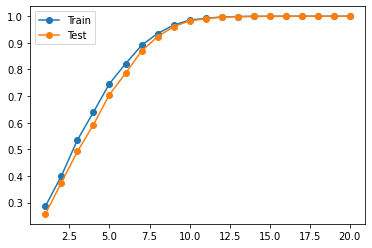

In [266]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth

for i in values:
    # configure the model
    model = XGBRegressor(max_depth=i, , objective='reg:squarederror')
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = r2_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = r2_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [268]:
rmse = []

for K in range(25):
    K = K+1
    
    xgb = XGBRegressor(max_depth=K,objective='reg:squarederror')
    xgb.fit(X_train,y_train)
    pred = xgb.predict(X_test)
    error = sqrt(MSE(y_test, pred))
    rmse.append(error)
    
    print(f'RMSE for {K} Depth: {error}')

RMSE for 1 neighbors: 6730.091782688255
RMSE for 2 neighbors: 6173.2086684533015
RMSE for 3 neighbors: 5564.86191719201
RMSE for 4 neighbors: 4985.249068879205
RMSE for 5 neighbors: 4235.102907173749
RMSE for 6 neighbors: 3618.820302640536
RMSE for 7 neighbors: 2821.820238209914
RMSE for 8 neighbors: 2168.5504676568958
RMSE for 9 neighbors: 1550.373767330439
RMSE for 10 neighbors: 1026.6814003146415
RMSE for 11 neighbors: 759.3198216289163
RMSE for 12 neighbors: 461.12124601885273
RMSE for 13 neighbors: 295.9366573599942
RMSE for 14 neighbors: 192.63120399928644
RMSE for 15 neighbors: 140.97303729646399
RMSE for 16 neighbors: 119.72426483169245
RMSE for 17 neighbors: 109.64723952761703
RMSE for 18 neighbors: 104.23000963318907
RMSE for 19 neighbors: 92.96449694787961
RMSE for 20 neighbors: 93.15866612146918
RMSE for 21 neighbors: 94.96182247425138
RMSE for 22 neighbors: 96.87546634641355
RMSE for 23 neighbors: 98.99420935018078
RMSE for 24 neighbors: 97.86004357084519
RMSE for 25 neigh

<AxesSubplot:>

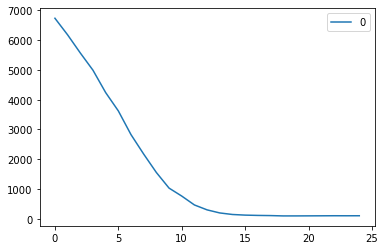

In [269]:
curve = pd.DataFrame(rmse)
curve.plot()

In [273]:
gbr = GradientBoostingRegressor()

er_model = VotingRegressor(estimators=[('xgb', xgb), ('gbr', gbr)], weights=[1,1])

In [274]:
er_model.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(max_depth=25,
                                          objective='reg:squarederror')),
                            ('gbr', GradientBoostingRegressor())],
                weights=[1, 1])

In [276]:
er_model.score(X_train, y_train)

0.8845643504575773

In [277]:
er_pred = er_model.predict(X_test)
evaluate_model(er_model, er_pred, y_test)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(max_depth=25,
                                          objective='reg:squarederror')),
                            ('gbr', GradientBoostingRegressor())],
                weights=[1, 1]) r2 score: 0.873386833271104
VotingRegressor(estimators=[('xgb',
                             XGBRegressor(max_depth=25,
                                          objective='reg:squarederror')),
                            ('gbr', GradientBoostingRegressor())],
                weights=[1, 1]) rmse: 2779.0754835390135
VotingRegressor(estimators=[('xgb',
                             XGBRegressor(max_depth=25,
                                          objective='reg:squarederror')),
                            ('gbr', GradientBoostingRegressor())],
                weights=[1, 1]) mae: 1832.7817656926304
VotingRegressor(estimators=[('xgb',
                             XGBRegressor(max_depth=25,
                                    

In [279]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
evaluate_model(gbr, gbr_pred, y_test)

GradientBoostingRegressor() r2 score: 0.49400559295783164
GradientBoostingRegressor() rmse: 5555.635772508203
GradientBoostingRegressor() mae: 3663.4190834683855
GradientBoostingRegressor() explained variance: 0.49405533576764626


In [283]:
xgb = XGBRegressor(max_depth=18, learning_rate=0.2, objective='reg:squarederror')

In [284]:
xgb.fit(X_train, y_train)

XGBRegressor(learning_rate=0.2, max_depth=20, objective='reg:squarederror')

In [285]:
xgb_pred = xgb.predict(X_test)

In [286]:
evaluate_model(xgb, xgb_pred, y_test)

XGBRegressor(learning_rate=0.2, max_depth=20, objective='reg:squarederror') r2 score: 0.9998604407042297
XGBRegressor(learning_rate=0.2, max_depth=20, objective='reg:squarederror') rmse: 92.26570235557148
XGBRegressor(learning_rate=0.2, max_depth=20, objective='reg:squarederror') mae: 1.918434689571586
XGBRegressor(learning_rate=0.2, max_depth=20, objective='reg:squarederror') explained variance: 0.999860441138127


In [290]:
xgb_pred[200]

7790.9937

In [291]:
y_test[200]

7791

In [293]:
pred = xgb.predict(X.iloc[:1, :])

In [294]:
pred

array([3976.9995], dtype=float32)

In [297]:
y[0]

3977

In [306]:
pipeline = Pipeline([
    ('xgb_r', XGBRegressor())
])
params = {
    # Parameters that we are going to tune.
    'xgb_r__colsample_bytree': [ 0.3, 0.5, 0.7 ],
    'xgb_r__gamma': [0.1, 0.3, 0.4 ],
    'xgb_r__learning_rate':[0.10, 0.30],
    'xgb_r__max_depth': [12, 18],
    'xgb_r__min_child_weight': range(5,8),
    
    # Other parameters
    'xgb_r__objective':['reg:squarederror']
}
        
xgb_modelcv = GridSearchCV(pipeline, 
                           param_grid=params, 
                           scoring='r2', 
                           verbose=3, cv=3)

In [307]:
xgb_modelcv.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   3.7s
[CV 2/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   3.7s
[CV 3/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   3.8s
[CV 1/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   3.8s
[CV 2/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   3.

[CV 3/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   4.0s
[CV 1/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   5.7s
[CV 2/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   5.7s
[CV 3/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   5.6s
[CV 1/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   5.7s
[CV 2/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.3, 

[CV 2/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.4, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   5.7s
[CV 3/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.4, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   5.8s
[CV 1/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   4.0s
[CV 2/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   4.0s
[CV 3/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   4.0s
[CV 1/3] END xgb_r__colsample_bytree=0.3, xgb_r__gamma=0.4, 

[CV 1/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.1, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   5.7s
[CV 2/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.1, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   5.6s
[CV 3/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.1, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   5.7s
[CV 1/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.1, xgb_r__learning_rate=0.3, xgb_r__max_depth=18, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   8.7s
[CV 2/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.1, xgb_r__learning_rate=0.3, xgb_r__max_depth=18, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   8.5s
[CV 3/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.1, 

[CV 3/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.3, xgb_r__learning_rate=0.3, xgb_r__max_depth=18, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   8.7s
[CV 1/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.3, xgb_r__learning_rate=0.3, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   8.7s
[CV 2/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.3, xgb_r__learning_rate=0.3, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   8.5s
[CV 3/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.3, xgb_r__learning_rate=0.3, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   8.4s
[CV 1/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.4, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   5.8s
[CV 2/3] END xgb_r__colsample_bytree=0.5, xgb_r__gamma=0.4, 

[CV 2/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   7.3s
[CV 3/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   7.3s
[CV 1/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   7.0s
[CV 2/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   7.1s
[CV 3/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.1, xgb_r__learning_rate=0.1, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   7.0s
[CV 1/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.1, 

[CV 1/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=  11.2s
[CV 2/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=  11.1s
[CV 3/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=  11.1s
[CV 1/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=  11.2s
[CV 2/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.3, xgb_r__learning_rate=0.1, xgb_r__max_depth=18, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=  11.0s
[CV 3/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.3, 

[CV 3/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=5, xgb_r__objective=reg:squarederror; total time=   6.9s
[CV 1/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   6.9s
[CV 2/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   7.0s
[CV 3/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=6, xgb_r__objective=reg:squarederror; total time=   6.9s
[CV 1/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.4, xgb_r__learning_rate=0.3, xgb_r__max_depth=12, xgb_r__min_child_weight=7, xgb_r__objective=reg:squarederror; total time=   6.9s
[CV 2/3] END xgb_r__colsample_bytree=0.7, xgb_r__gamma=0.4, 

GridSearchCV(cv=3, estimator=Pipeline(steps=[('xgb_r', XGBRegressor())]),
             param_grid={'xgb_r__colsample_bytree': [0.3, 0.5, 0.7],
                         'xgb_r__gamma': [0.1, 0.3, 0.4],
                         'xgb_r__learning_rate': [0.1, 0.3],
                         'xgb_r__max_depth': [12, 18],
                         'xgb_r__min_child_weight': range(5, 8),
                         'xgb_r__objective': ['reg:squarederror']},
             scoring='r2', verbose=3)

In [308]:
xgb_modelcv.best_estimator_

Pipeline(steps=[('xgb_r',
                 XGBRegressor(colsample_bytree=0.5, gamma=0.3,
                              learning_rate=0.3, max_depth=18,
                              min_child_weight=5,
                              objective='reg:squarederror'))])

In [313]:
xgb_modelcv_pred = xgb_modelcv.predict(X_test)

In [314]:
evaluate_model(xgb_modelcv, xgb_modelcv_pred, y_test)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('xgb_r', XGBRegressor())]),
             param_grid={'xgb_r__colsample_bytree': [0.3, 0.5, 0.7],
                         'xgb_r__gamma': [0.1, 0.3, 0.4],
                         'xgb_r__learning_rate': [0.1, 0.3],
                         'xgb_r__max_depth': [12, 18],
                         'xgb_r__min_child_weight': range(5, 8),
                         'xgb_r__objective': ['reg:squarederror']},
             scoring='r2', verbose=3) r2 score: 0.9997394919507006
GridSearchCV(cv=3, estimator=Pipeline(steps=[('xgb_r', XGBRegressor())]),
             param_grid={'xgb_r__colsample_bytree': [0.3, 0.5, 0.7],
                         'xgb_r__gamma': [0.1, 0.3, 0.4],
                         'xgb_r__learning_rate': [0.1, 0.3],
                         'xgb_r__max_depth': [12, 18],
                         'xgb_r__min_child_weight': range(5, 8),
                         'xgb_r__objective': ['reg:squarederror']},
             scoring='r2', verbos

In [315]:
xgb_modelcv_pred[0]

852.53827

In [316]:
y_test[0]

850

In [318]:
import pickle
filename1 = 'xgb_modelcv.pkl'
pickle.dump(xgb_modelcv, open(filename1, 'wb'))

In [319]:
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9997394919507006
